In [1]:
import argparse
import src.utility
from time import time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# utility
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataframe = pd.read_csv('output/dataframe_lem.csv', sep='\t', index_col=0)

In [5]:
msk = np.random.rand(len(dataframe)) < 0.8

In [7]:
np.save('output/mask.npy', msk)

In [8]:
from src import lda_calculation

In [9]:
id2word = corpora.Dictionary.load("output/lda_dict.pkl")

In [10]:
corpus = list(corpora.MmCorpus("output/lda_corpus.mm"))

In [16]:
lda_model = gensim.models.wrappers.LdaMallet("Mallet/mallet-2.0.8/bin/mallet", corpus=corpus2[msk], num_topics=26, id2word=id2word, workers=52, prefix="tmp/infer")

KeyboardInterrupt: 

In [12]:
corpus2 = np.asarray(corpus)

In [15]:
corpus3 = corpus2[msk]

In [6]:
dataframe = pd.read_csv('output/dataframe_temp.csv', sep=',', index_col=0)

/home/momen/virtualenv/cs6724/local/lib/python2.7/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [11]:
from sklearn.linear_model import Lasso

In [31]:
lassoreg = Lasso(alpha=0.1, normalize=True, max_iter=1e5)

In [4]:
column_names = list(dataframe.columns.values)[4:]

In [5]:
dataframe[column_names].head()

money  family     funct  feel   certain   insight  assent        we  \
0    0.0     0.0  0.000000   0.0  0.000000  0.000000     0.0  0.000000   
1    0.0     0.0  0.333333   0.0  0.000000  0.000000     0.0  0.000000   
2    0.0     0.0  0.200000   0.0  0.000000  0.000000     0.0  0.066667   
3    0.0     0.0  0.000000   0.0  0.000000  0.000000     0.0  0.000000   
4    0.0     0.0  0.166667   0.0  0.166667  0.166667     0.0  0.000000   

        sad      past  ...        work  ingest     auxvb  motion    achiev  \
0  0.000000  0.000000  ...    0.000000     0.0  0.000000     0.0  0.000000   
1  0.111111  0.000000  ...    0.111111     0.0  0.000000     0.0  0.000000   
2  0.000000  0.133333  ...    0.066667     0.0  0.066667     0.0  0.000000   
3  0.000000  0.000000  ...    0.000000     0.0  0.000000     0.0  0.250000   
4  0.000000  0.000000  ...    0.000000     0.0  0.000000     0.0  0.166667   

   future      time    posemo      incl  shehe  
0     0.0  0.000000  0.200000  0.000000    0.0  
1     0.0  0.000000  0.111111  0.000000    0.0  
2     0.0  0.066667  0.000000  0.066667    0.0  
3     0.0  0.000000  0.000000  0.000000    0.0  
4     0.0  0.000000  0.000000  0.000000    0.0  

[5 rows x 63 columns]

In [9]:
from sklearn.model_selection import train_test_split

In [44]:
df_sample = dataframe.sample(frac=0.006, replace=False)

In [58]:
df_sample[df_sample["category"]==0].count()

category      128224
clean_text    122613
date          128224
relig         128224
money         128224
family        128224
funct         128224
feel          128224
certain       128224
insight       128224
assent        128224
we            128224
sad           128224
past          128224
negate        128224
see           128224
adverbs       128224
numbers       128224
affect        128224
anger         128224
home          128224
conj          128224
anx           128224
negemo        128224
verbs         128224
ppron         128224
sexual        128224
death         128224
pronoun       128224
space         128224
               ...  
quant         128224
nonflu        128224
cause         128224
prep          128224
body          128224
bio           128224
tentat        128224
humans        128224
social        128224
leisure       128224
inhib         128224
hear          128224
they          128224
article       128224
excl          128224
friends       128224
you          

In [45]:
result_model = lassoreg.fit(df_sample[column_names],df_sample['category'])

In [46]:
df_sample_2 = dataframe.sample(frac=0.004, replace=False)

In [48]:
predicted = result_model.predict(df_sample_2[column_names])

In [19]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, precision_recall_fscore_support

In [60]:
accuracy_score(df_sample_2['category'],predicted>0.5)
precision_score(df_sample_2['category'],predicted>0.5)
recall_score(df_sample_2['category'],predicted>0.5)
f1_score(df_sample_2['category'],predicted>0.5)

0.0

In [62]:
accuracy_score(df_sample_2['category'],predicted>)

SyntaxError: invalid syntax (<ipython-input-62-830f6fd520b6>, line 1)

In [31]:
precision_score(df_sample_2['category'],predicted>0.5)

0.0

In [63]:
precision_recall_fscore_support(df_sample_2['category'],y_pred>0.5,average="binary")

(0.45071139087695095, 0.823004251299008, 0.5824492979719188, None)

In [34]:
len(column_names)

64

In [50]:
result_model.coef_.tolist()

[0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0]

In [8]:
from scipy import stats

In [9]:
for col in column_names:
    rvs1 = dataframe[dataframe["category"]==0][col]
    rvs2 = dataframe[dataframe["category"]==1][col]
    print col, stats.ks_2samp(rvs1, rvs2)

money Ks_2sampResult(statistic=0.031932194157341054, pvalue=0.0)
family Ks_2sampResult(statistic=0.005919422582027378, pvalue=5.339899174106417e-278)
funct Ks_2sampResult(statistic=0.1325537484993376, pvalue=0.0)
feel Ks_2sampResult(statistic=0.005856854990046401, pvalue=3.6674104571933584e-272)
certain Ks_2sampResult(statistic=0.03330231948865947, pvalue=0.0)
insight Ks_2sampResult(statistic=0.01690463533847475, pvalue=0.0)
assent Ks_2sampResult(statistic=0.002772231121916602, pvalue=2.633508897638444e-61)
we Ks_2sampResult(statistic=0.020240637357521463, pvalue=0.0)
sad Ks_2sampResult(statistic=0.0032199851568563975, pvalue=1.466424822690937e-82)
past Ks_2sampResult(statistic=0.04039246456749179, pvalue=0.0)
negate Ks_2sampResult(statistic=0.024154413164455324, pvalue=0.0)
see Ks_2sampResult(statistic=0.014684453381171414, pvalue=0.0)
adverbs Ks_2sampResult(statistic=0.042166960260787034, pvalue=0.0)
numbers Ks_2sampResult(statistic=0.012434271257356078, pvalue=0.0)
affect Ks_2sampRe

In [60]:
dataframe.iloc[1]["text"]

KeyError: 'text'

In [109]:
dataframe['relig'].sum()

0.0

In [66]:
import lib.liwc

In [67]:
DICTIONARIES_PATH = None
FILTERS = {'all':(lambda x:True),
	'first_level':(lambda x: os.path.splitext(x)[0] in 'pronoun article prep auxvb adverbs conj negate'.split(' ') +
		'verbs numbers quant'.split(' ') +
		'posemo negemo'.split(' ') +
		'family friends'.split(' ') +
		'insight cause discrep tentat certain excl'.split(' ') +
		'see hear feel'.split(' ') +
		'body health sexual ingest'.split(' ') +
		['achiev'] +
		'past present future'.split(' ') +
		'motion space time'.split(' ') +
		'work leisure home money religion death'.split(' ') +
		'swear assent nonflu filler'.split(' ')
		)
}

In [68]:
length  = len(filter(None, dataframe.iloc[0]["clean_text"].split()))

In [69]:
length

5

In [77]:
val = float(match_liwc('read',dataframe.iloc[0]["clean_text"]))/length

In [104]:
dataframe.iloc[0]["clean_text"]

'Get ready Oscars writing genius'

In [74]:
def match_liwc(ptrn, txt):
    try:
	    return len(re.findall(ptrn, txt))
    except:
    	return 0

In [86]:
val

0.2

In [99]:
dataframe['g']=0.0

In [101]:
row['g'] = float(match_liwc('read',row["clean_text"]))/length

/home/momen/virtualenv/cs6724/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [100]:
row = dataframe.iloc[[0]]

In [102]:
row

category                       clean_text                 date  relig  \
0         1  Get ready Oscars writing genius  2017-02-26 18:58:49      0   

   money  family  funct  feel  certain  insight ...   auxvb  motion  achiev  \
0      0       0      0     0        0        0 ...       0       0       0   

   future  time  posemo  incl  shehe    f    g  
0       0     0       0     0      0  0.0  0.0  

[1 rows x 69 columns]

In [110]:
df_sample = dataframe.sample(n=10)

In [127]:
for index in df_sample.index:
    length = len(filter(None, row["clean_text"].split()))
    if length != 0:
        print "inside"
        print float(match_liwc('lib',row["clean_text"].lower()))/length
        df_sample.at[index,'money'] = float(match_liwc('lib',df_sample.at[index,"clean_text"].lower()))/length

inside
0.0
inside
0.0
inside
0.0
inside
0.0
inside
0.0
inside
0.0
inside
0.0
inside
0.0
inside
0.0
inside
0.0


In [128]:
df_sample.head()

category                                         clean_text  \
162058         0  ' Libya Was Destroyed NATO , It Will Take Deca...   
417842         0  And The Winner Of The 2016 Election Is ... Weed !   
155359         0  Watercooler 2/4OpenThread : WeekinHistory ; HE...   
3246           0  This monster responsible killing 39 innocent p...   
683770         1  Donald Trump planning make Muslims immigrants ...   

                       date  relig     money  family  funct  feel  certain  \
162058  2016-10-21 03:01:59    0.0  0.166667     0.0    0.0   0.0      0.0   
417842  2016-11-10 11:16:55    0.0  0.000000     0.0    0.0   0.0      0.0   
155359  2017-02-04 17:18:07    0.0  0.000000     0.0    0.0   0.0      0.0   
3246    2017-01-16 22:00:17    0.0  0.000000     0.0    0.0   0.0      0.0   
683770  2016-11-16 17:34:18    0.0  0.000000     0.0    0.0   0.0      0.0   

        insight  ...    work  ingest  auxvb  motion  achiev  future  time  \
162058      0.0  ...     0.0     0.0    0.0     0.0     0.0     0.0   0.0   
417842      0.0  ...     0.0     0.0    0.0     0.0     0.0     0.0   0.0   
155359      0.0  ...     0.0     0.0    0.0     0.0     0.0     0.0   0.0   
3246        0.0  ...     0.0     0.0    0.0     0.0     0.0     0.0   0.0   
683770      0.0  ...     0.0     0.0    0.0     0.0     0.0     0.0   0.0   

        posemo  incl  shehe  
162058     0.0   0.0    0.0  
417842     0.0   0.0    0.0  
155359     0.0   0.0    0.0  
3246       0.0   0.0    0.0  
683770     0.0   0.0    0.0  

[5 rows x 67 columns]

In [10]:
for col in column_names:
    print col

money
family
funct
feel
certain
insight
assent
we
sad
past
negate
see
adverbs
numbers
affect
anger
home
conj
anx
negemo
verbs
ppron
sexual
death
pronoun
space
filler
ipron
percept
swear
health
discrep
relativ
quant
nonflu
cause
prep
body
bio
tentat
humans
social
leisure
inhib
hear
they
article
excl
friends
you
present
i
cogmec
work
ingest
auxvb
motion
achiev
future
time
posemo
incl
shehe


In [34]:
ts = dataframe['relig']

In [35]:
ts = ts.cumsum()

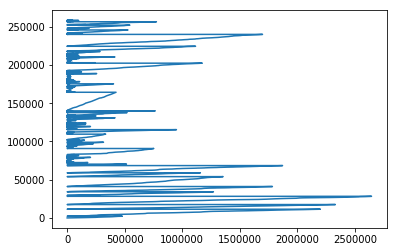

In [36]:
ts.plot()

In [43]:
column_names = column_names[:10]

In [51]:
from sklearn.naive_bayes import GaussianNB

In [52]:
gnb = GaussianNB()

In [53]:
y_pred = gnb.fit(df_sample[column_names], df_sample["category"]).predict(df_sample_2[column_names])

In [54]:
print("Number of mislabeled points out of a total %d points : %d" % (df_sample_2.shape[0],(df_sample_2["category"] != y_pred).sum()))

Number of mislabeled points out of a total 149180 points : 74942


In [56]:
gnb.sigma_

array([[0.00216326, 0.00049643, 0.03849861, 0.00042718, 0.00129068,
        0.00210688, 0.00064314, 0.00080094, 0.00067389, 0.00176339],
       [0.00334569, 0.00038579, 0.03212785, 0.00052751, 0.00069326,
        0.00203978, 0.00030319, 0.00076183, 0.00069785, 0.00127971]])

In [57]:
74942/149180

0